# MODELING; WHAT DRIVES CROSS SELL SUCCESS?

With the Apprentice Chef data set we are tasked to run a variety of models in order to establish which factors influence the success of cross selling and why. Cross sell means that a customer buys for instance a single meal, but includes to purchase a bottle of wine or another beverage. Another example could be is that the customer upgrades to a weekly plan. 

All the way down in this script is a reflection and a conclusion to be read about this project.

The below code imports the vast majority of the Python packages necessary to develop this analysis. However, throughout the script a few other packages will be imported such as seaborn, make scorer, auc scorer and a couple more.

The code block below also sets the sizes of how we want to display the panda dataframes, and of which excel file to import.


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import seaborn as sns


# loading data

file = 'Cross_Sell_Success_Dataset_2023.xlsx'

classmeal = pd.read_excel(io = file)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

classmeal.head(n=10)

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174
5,0,rollam.westerling@jnj.com,2917.5,246,7,1,2,240.3,1,5,1,20,0,240.90,8,4.473684,16
6,0,utt@passport.com,3901.5,316,10,1,5,183.8,2,5,2,46,4,140.01,6,3.157895,584
7,0,bandy@aol.com,5000.0,251,10,1,1,269.6,4,5,2,40,0,143.00,8,2.894737,1095
8,1,rickard.karstark@live.com,3090.0,256,7,1,5,218.4,2,6,1,30,0,120.34,6,2.894737,198
9,1,androw.frey@protonmail.com,5745.0,297,8,1,6,266.8,1,6,1,32,0,140.88,8,2.894737,664


In [2]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

To initiate the analysis, I first decided to have a look at the new column called 'CROSS_SELL_SUCCESS'. Below a graphical representation of the column where around 600 rows of data consist of a zero (no success of cross sell) and around 1300 rows of data consist of a 1 (success of cross sell).

Text(0, 0.5, 'COUNT')

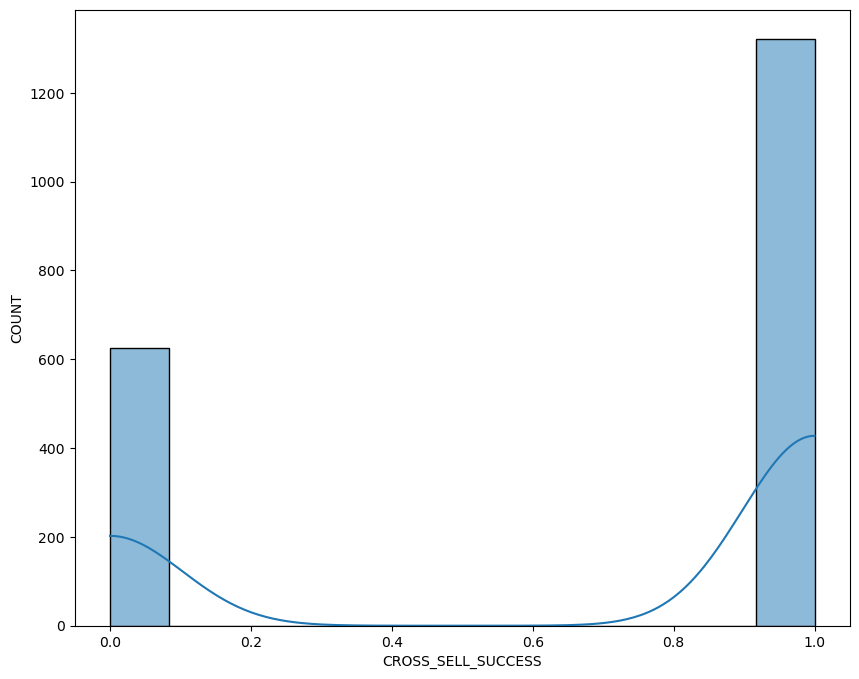

In [3]:
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
sns.histplot(data = classmeal,
                   x = 'CROSS_SELL_SUCCESS',
                 kde = True)


# adding labels but not adding title
plt.xlabel(xlabel = 'CROSS_SELL_SUCCESS')
plt.ylabel(ylabel = 'COUNT')


As the dataset has been printed above, the code cell below starts to explore the rest of the dataset a bit more in detail. 

The scatterplots clearly show which features are of continuous nature, and which are of categorical/interval nature. This benefits for later in the analysis.

Text(0, 0.5, 'REVENUE')

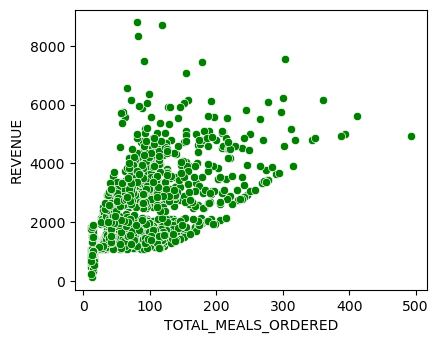

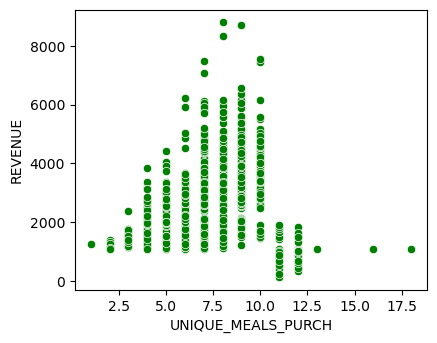

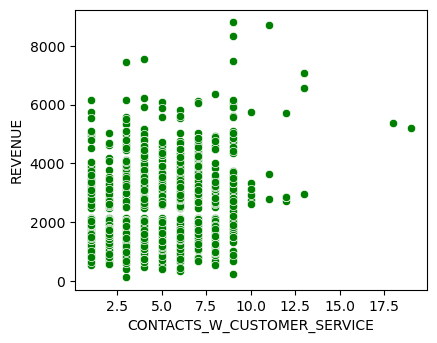

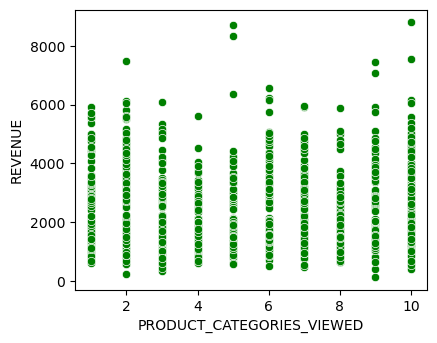

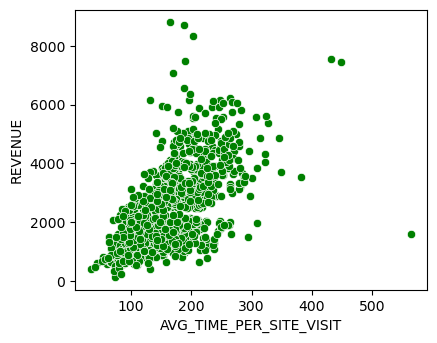

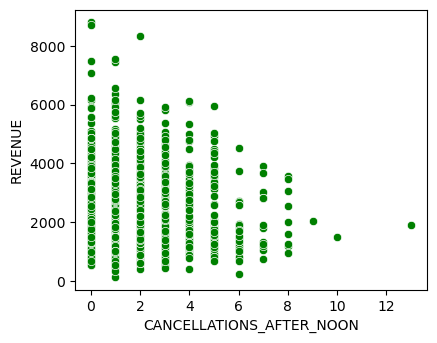

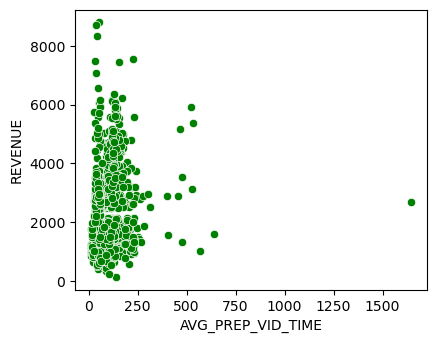

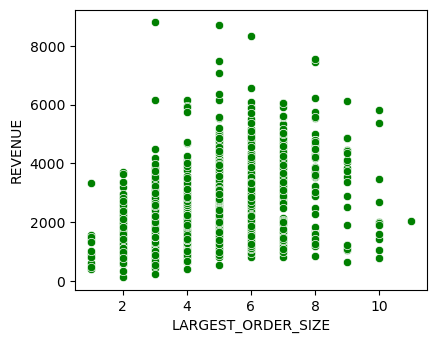

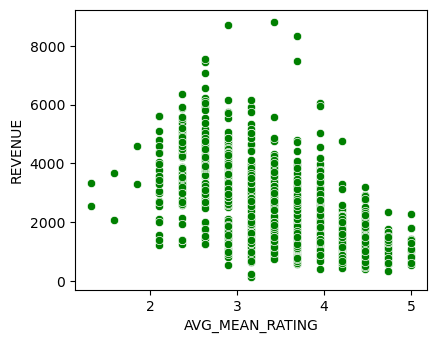

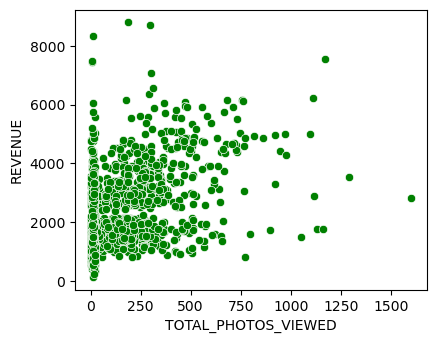

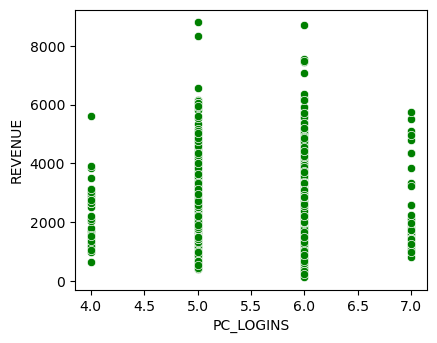

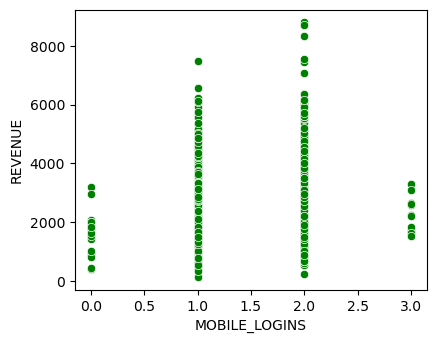

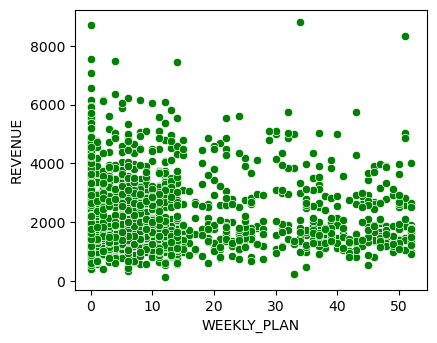

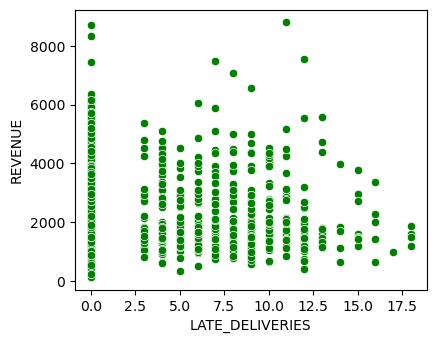

In [4]:
########################
# Visual EDA (Scatterplots, histograms, boxplots)
########################

#############################################################################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = classmeal['TOTAL_MEALS_ORDERED'],
                y = classmeal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = classmeal['UNIQUE_MEALS_PURCH'],
                y = classmeal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'UNIQUE_MEALS_PURCH')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = classmeal['CONTACTS_W_CUSTOMER_SERVICE'],
                y = classmeal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = classmeal['PRODUCT_CATEGORIES_VIEWED'],
                y = classmeal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'PRODUCT_CATEGORIES_VIEWED')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = classmeal['AVG_TIME_PER_SITE_VISIT'],
                y = classmeal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_TIME_PER_SITE_VISIT')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = classmeal['CANCELLATIONS_AFTER_NOON'],
                y = classmeal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'CANCELLATIONS_AFTER_NOON')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = classmeal['AVG_PREP_VID_TIME'],
                y = classmeal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_PREP_VID_TIME')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = classmeal['LARGEST_ORDER_SIZE'],
                y = classmeal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'LARGEST_ORDER_SIZE')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = classmeal['AVG_MEAN_RATING'],
                y = classmeal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_MEAN_RATING')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = classmeal['TOTAL_PHOTOS_VIEWED'],
                y = classmeal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_PHOTOS_VIEWED')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################


# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = classmeal['PC_LOGINS'],
                y = classmeal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'PC_LOGINS')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = classmeal['MOBILE_LOGINS'],
                y = classmeal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'MOBILE_LOGINS')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = classmeal['WEEKLY_PLAN'],
                y = classmeal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'WEEKLY_PLAN')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = classmeal['LATE_DELIVERIES'],
                y = classmeal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'LATE_DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################



Text(0, 0.5, 'CROSS_SELL_SUCCESS')

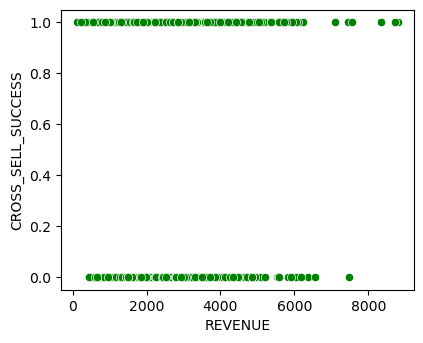

In [5]:
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = classmeal['REVENUE'],
                y = classmeal['CROSS_SELL_SUCCESS'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'REVENUE')
plt.ylabel(ylabel = 'CROSS_SELL_SUCCESS')

In [6]:
# Count the frequency of weekly plans ordered for each CROSS_SELL_SUCCESS category
cross_sell_success_counts = classmeal.groupby('CROSS_SELL_SUCCESS')['WEEKLY_PLAN'].value_counts()

# Display the results
print(cross_sell_success_counts)


CROSS_SELL_SUCCESS  WEEKLY_PLAN
0                   0              143
                    8               31
                    1               30
                    14              30
                    2               28
                    11              28
                    12              27
                    7               25
                    9               24
                    4               23
                    5               23
                    6               23
                    3               21
                    10              20
                    13              20
                    35               9
                    22               6
                    26               6
                    50               6
                    37               5
                    46               5
                    52               5
                    15               4
                    19               4
                    20          

In [7]:
############################################################################
#                CHECKING WHETHER THERE ARE NULL VALUES
############################################################################ 
classmeal.isnull().sum()

CROSS_SELL_SUCCESS             0
EMAIL                          0
REVENUE                        0
TOTAL_MEALS_ORDERED            0
UNIQUE_MEALS_PURCH             0
CONTACTS_W_CUSTOMER_SERVICE    0
PRODUCT_CATEGORIES_VIEWED      0
AVG_TIME_PER_SITE_VISIT        0
CANCELLATIONS_AFTER_NOON       0
PC_LOGINS                      0
MOBILE_LOGINS                  0
WEEKLY_PLAN                    0
LATE_DELIVERIES                0
AVG_PREP_VID_TIME              0
LARGEST_ORDER_SIZE             0
AVG_MEAN_RATING                0
TOTAL_PHOTOS_VIEWED            0
dtype: int64

In the cell below I am checking for skewness of the original values, and I will log transform them into log_variables if their skewness is higher than 1.0. I am not sure whether this is good practise for a binary classification project, as skewness seems not to be so relevant anymore. 

In [8]:
############################################################################
#                CHECKING EVERY VARIABLE FOR SKEWNESS HERE
############################################################################

print(f"Skew REVENUE: {round(classmeal['REVENUE'].skew(), ndigits = 2)}")

print(f"Skew TOTAL_MEALS_ORDERED: {round(classmeal['TOTAL_MEALS_ORDERED'].skew(), ndigits = 2)}")
print(f"Skew UNIQUE_MEALS_PURCH: {round(classmeal['UNIQUE_MEALS_PURCH'].skew(), ndigits = 2)}")
print(f"Skew CONTACTS_W_CUSTOMER_SERVICE: {round(classmeal['CONTACTS_W_CUSTOMER_SERVICE'].skew(), ndigits = 2)}")
print(f"Skew PRODUCT_CATEGORIES_VIEWED: {round(classmeal['PRODUCT_CATEGORIES_VIEWED'].skew(), ndigits = 2)}")
print(f"Skew AVG_TIME_PER_SITE_VISIT: {round(classmeal['AVG_TIME_PER_SITE_VISIT'].skew(), ndigits = 2)}")
print(f"Skew CANCELLATIONS_AFTER_NOON: {round(classmeal['CANCELLATIONS_AFTER_NOON'].skew(), ndigits = 2)}")
print(f"Skew PC_LOGINS: {round(classmeal['PC_LOGINS'].skew(), ndigits = 2)}")
print(f"Skew MOBILE_LOGINS: {round(classmeal['MOBILE_LOGINS'].skew(), ndigits = 2)}")
print(f"Skew WEEKLY_PLAN: {round(classmeal['WEEKLY_PLAN'].skew(), ndigits = 2)}")
print(f"Skew LATE_DELIVERIES: {round(classmeal['LATE_DELIVERIES'].skew(), ndigits = 2)}")
print(f"Skew AVG_PREP_VID_TIME: {round(classmeal['AVG_PREP_VID_TIME'].skew(), ndigits = 2)}")
print(f"Skew LARGEST_ORDER_SIZE: {round(classmeal['LARGEST_ORDER_SIZE'].skew(), ndigits = 2)}")
print(f"Skew AVG_MEAN_RATING: {round(classmeal['AVG_MEAN_RATING'].skew(), ndigits = 2)}")
print(f"Skew TOTAL_PHOTOS_VIEWED: {round(classmeal['TOTAL_PHOTOS_VIEWED'].skew(), ndigits = 2)}")

Skew REVENUE: 1.63
Skew TOTAL_MEALS_ORDERED: 2.01
Skew UNIQUE_MEALS_PURCH: 0.57
Skew CONTACTS_W_CUSTOMER_SERVICE: 0.37
Skew PRODUCT_CATEGORIES_VIEWED: 0.16
Skew AVG_TIME_PER_SITE_VISIT: 1.2
Skew CANCELLATIONS_AFTER_NOON: 1.44
Skew PC_LOGINS: -0.04
Skew MOBILE_LOGINS: 0.05
Skew WEEKLY_PLAN: 1.54
Skew LATE_DELIVERIES: 1.71
Skew AVG_PREP_VID_TIME: 9.64
Skew LARGEST_ORDER_SIZE: 0.7
Skew AVG_MEAN_RATING: -0.11
Skew TOTAL_PHOTOS_VIEWED: 2.6


In the cell below I am transforming the column 'EMAIL' into three domains; professional, personal and junk (dummy variables, binary)

These columns might help out as they can have a stronger correlation with CROSS_SELL_SUCCESS than the other features in the dataset. 

In [9]:
# STEP 1: splitting emails into domains, professional, personal and junk

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in classmeal.iterrows():
    
    # splitting email domain at '@'
    split_email = classmeal.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

,0,1
0,steffon.baratheon,yahoo.com
1,harlon.greyjoy,visa.com
2,monster,protonmail.com
3,damon.lannister.(lord),yahoo.com
4,raynald.westerling,jnj.com
...,...,...
1941,wat.(barleycorn),live.com
1942,hendry.bracken,exxon.com
1943,aenys.i.targaryen,passport.com
1944,leo.blackbar,pg.com


In [10]:
# STEP 2: concatenating with original DataFrame

# safety measure in case of multiple concatenations
classmeal = pd.read_excel(file)


# renaming column to concatenate
email_df.columns = ['0' , 'EMAIL_DOMAIN']


# concatenating personal_email_domain with friends DataFrame
classmeal = pd.concat([classmeal, email_df['EMAIL_DOMAIN']],
                     axis = 1)


# printing value counts of personal_email_domain
classmeal.loc[: ,'EMAIL_DOMAIN'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
jnj.com              28
merck.com            28
mcdonalds.com        28
cocacola.com         28
apple.com            27
nike.com             27
ge.org               26
dupont.com           26
ibm.com              26
chevron.com          25
microsoft.com        25
unitedhealth.com     24
travelers.com        24
exxon.com            24
boeing.com           23
pg.com               22
verizon.com          22
mmm.com              22
caterpillar.com      22
walmart.com          21
disney.com           21
pfizer.com           20
visa.com             20
jpmorgan.com         19
goldmansacs.com      18
cisco.com            18
unitedtech.com       18
intel.com            17
homedepot.com        17
Name: EMAIL_DOMAIN, dtype: int64

In [11]:
# email domain types
personal_email_domains     = ['gmail.com', 'yahoo.com', 'protonmail.com']
professional_email_domains = ['mmm.com', 'amex.com', 'apple.com', 'boeing.com',
                              'caterpillar.com', 'chevron.com', 'cisco.com', 'cocacola.com','disney.com',
                              'dupont.com', 'exxon.com', 'ge.org', 'goldmansacs.com','homedepot.com', 
                              'ibm.com', 'intel.com', 'jnj.com', 'jpmorgan.com','mcdonalds.com', 
                              'merck.com', 'microsoft.com', 'nike.com', 'pfizer.com','pg.com', 'travelers.com',
                              'unitedtech.com', 'unitedhealth.com', 'verizon.com','visa.com', 'walmart.com']
junk_email_domains         = ['me.com', 'aol.com', 'hotmail.com', 'live.com', 'msn.com', 'passport.com']

# placeholder list
placeholder_lst = []

# looping to group observations by domain type
for email in classmeal['EMAIL']:
    domain = email.split('@')[1]
    
    if domain in personal_email_domains:
        placeholder_lst.append('personal')
        
    elif domain in professional_email_domains:
        placeholder_lst.append('professional')
        
    elif domain in junk_email_domains:
        placeholder_lst.append('junk')
        
    else:
        print('Unknown')

# concatenating with original DataFrame
classmeal['DOMAIN_GROUP'] = pd.Series(placeholder_lst)

# checking results
classmeal['DOMAIN_GROUP'].value_counts()


personal        861
professional    696
junk            389
Name: DOMAIN_GROUP, dtype: int64

In [12]:
# DO NOT RUN AGAIN OTHERWISE YOU CREATE MORE UNNECCESSARY DUMMY VARIABLES

############################################################################
#                CREATING DUMMY VARIABLES FOR EMAIL DOMAINS
############################################################################

# Creating categorical variables for the emails
dummy = pd.get_dummies(classmeal['DOMAIN_GROUP'], prefix = 'DOMAIN_GROUP')

#dropping the original domain group category since it has become unneccessary
classmeal.drop('DOMAIN_GROUP', axis = 1, inplace = True)

classmeal = pd.concat([classmeal, dummy], axis=1)

In [13]:
############################################################################
#                      DEVELOP NEW FEATURES HERE
############################################################################

# BASED OF REVENUE
classmeal['NUM_MEALS_PER_PURCH'] = (classmeal['TOTAL_MEALS_ORDERED'] / classmeal['UNIQUE_MEALS_PURCH']).round(decimals=2)

classmeal['REV_PER_UNIQUE_PURCH'] = (classmeal['REVENUE'] / classmeal['UNIQUE_MEALS_PURCH']).round(decimals=2)

classmeal['PRICE_PER_MEAL'] = (classmeal['REVENUE'] / classmeal['TOTAL_MEALS_ORDERED']).round(decimals=2)\



In [14]:
############################################################################
#                      DEVELOP NEW FEATURES HERE
############################################################################

# BASED OF AVG_TIME_PER_SITE_VISIT

classmeal['TIME_ON_SITE_MOB'] = (classmeal['AVG_TIME_PER_SITE_VISIT'] / classmeal['MOBILE_LOGINS']).round(decimals = 2)                 

classmeal['TIME_ON_SITE_PC'] = (classmeal['AVG_TIME_PER_SITE_VISIT'] / classmeal['PC_LOGINS']).round(decimals = 2)

# Correlation

Why are the correlations of each feature so low when compared to the Y-variable? There seems to be no strong explainer as to predict CROSS_SELL_SUCCESS.

However, it remains strange because in our value_counts table we observed numerically (no models, or calculations) that features such as revenue, weekly plan and time on site had a significant impact on the 'ones and zeroes' of cross selling. 

In [15]:
classmeal_corr = classmeal.corr('pearson').round(decimals = 2)

classmeal_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
DOMAIN_GROUP_professional      0.19
CANCELLATIONS_AFTER_NOON       0.14
MOBILE_LOGINS                  0.06
UNIQUE_MEALS_PURCH             0.04
DOMAIN_GROUP_personal          0.04
PC_LOGINS                      0.04
AVG_TIME_PER_SITE_VISIT        0.03
LATE_DELIVERIES                0.02
LARGEST_ORDER_SIZE             0.02
TIME_ON_SITE_PC                0.02
TOTAL_PHOTOS_VIEWED            0.01
TOTAL_MEALS_ORDERED            0.01
AVG_PREP_VID_TIME              0.01
REVENUE                        0.00
PRODUCT_CATEGORIES_VIEWED      0.00
CONTACTS_W_CUSTOMER_SERVICE   -0.00
WEEKLY_PLAN                   -0.01
NUM_MEALS_PER_PURCH           -0.01
PRICE_PER_MEAL                -0.02
TIME_ON_SITE_MOB              -0.02
AVG_MEAN_RATING               -0.04
REV_PER_UNIQUE_PURCH          -0.04
DOMAIN_GROUP_junk             -0.28
Name: CROSS_SELL_SUCCESS, dtype: float64

In [16]:
# DO NOT RUN AGAIN OTHERWISE YOU CREATE MORE UNNECCESSARY DUMMY VARIABLES

############################################################################
#                CREATING A DUMMY FEATURE FOR CROSS_SELL_SUCCESS
############################################################################

dummy = pd.get_dummies(classmeal['CROSS_SELL_SUCCESS'], prefix = 'CROSS_SELL_SUCCESS')

classmeal = pd.concat([classmeal, dummy], axis=1)


Calculating the mean of the y-variable, I have ideas to use it as a benchmark later on in the analysis. 

If benchmark > mean, then they are more likely to cross sell
If benchmark < mean, they are not likely to cross sell. 

In [17]:
classmeal['CROSS_SELL_SUCCESS'].mean()

0.6788283658787256

The blocks of code below function as a way of exploring the dataset

In [18]:
classmeal.loc[classmeal.TOTAL_MEALS_ORDERED > 95, ['WEEKLY_PLAN',
                                            'TOTAL_MEALS_ORDERED',
                                            'CROSS_SELL_SUCCESS']].sort_values('WEEKLY_PLAN',ascending = False).groupby('CROSS_SELL_SUCCESS').mean()

,WEEKLY_PLAN,TOTAL_MEALS_ORDERED
CROSS_SELL_SUCCESS,,
0,12.114865,155.804054
1,10.976190,146.955357


In [19]:
classmeal.loc[classmeal.TOTAL_MEALS_ORDERED < 60, ['WEEKLY_PLAN',
                                     'TOTAL_MEALS_ORDERED',
                                     'CROSS_SELL_SUCCESS']].sort_values('WEEKLY_PLAN',ascending = False).groupby('CROSS_SELL_SUCCESS').describe()

WEEKLY_PLAN                                                  TOTAL_MEALS_ORDERED                                                    
                         count       mean        std  min  25%  50%   75%   max               count       mean        std   min   25%   50%   75%   max
CROSS_SELL_SUCCESS                                                                                                                                     
0                        321.0  10.800623  13.086878  0.0  1.0  7.0  13.0  52.0               321.0  35.688474  14.071341  11.0  28.0  38.0  47.0  59.0
1                        644.0  11.517081  13.843426  0.0  1.0  8.0  14.0  52.0               644.0  37.245342  14.804335  11.0  28.0  40.0  50.0  59.0

In [20]:
# GOING TO DIVIDE THE BELOW FEATURE INTO QUARTILES AND GIVE IT A RANKING
# JUST SEE IF AND HOW IT IMPACTS VARIOUS STATISTICS

classmeal['AVG_TIME_PER_SITE_VISIT'].describe()

count    1946.000000
mean      150.556578
std        49.447180
min        33.400000
25%       114.400000
50%       145.600000
75%       173.775000
max       564.200000
Name: AVG_TIME_PER_SITE_VISIT, dtype: float64

The code below does not run properly, it was trying to divide up the AVG_TIME_PER_SITE_VISIT, but I could not figure out how to do it bug-free. That is why it's all been commented out, but it's still here for future reference. 

In [21]:
#pf = pd.DataFrame({'AVG_TIME_PER_SITE_VISIT'})


# calculate quartiles
#q1, q2, q3 = np.percentile(pf['AVG_TIME_PER_SITE_VISIT'], [25, 50, 75])

# create new column
#pf['quartile_AVG_TIME_PER_SITE_VISIT'] = 0

# set values based on quartile
#for index, row in pf.iterrows():
#    if row['AVG_TIME_PER_SITE_VISIT'] <= q1:
#        pf.at[index, 'quartile_AVG_TIME_PER_SITE_VISIT'] = 0
#    elif row['AVG_TIME_PER_SITE_VISIT'] <= q2:
#        pf.at[index, 'quartile_AVG_TIME_PER_SITE_VISIT'] = 1
#    elif row['AVG_TIME_PER_SITE_VISIT'] <= q3:
#        pf.at[index, 'quartile_AVG_TIME_PER_SITE_VISIT'] = 2
#    else:
#        pf.at[index, 'quartile_AVG_TIME_PER_SITE_VISIT'] = 3
        
#pf

In [22]:
############################################################################
#                CHECKING SKEWNESS FOR NEW FEATURES
############################################################################

print(f"Skew NUM_MEALS_PER_PURCH: {round(classmeal['NUM_MEALS_PER_PURCH'].skew(), ndigits = 2)}")
print(f"Skew REV_PER_UNIQUE_PURCH: {round(classmeal['REV_PER_UNIQUE_PURCH'].skew(), ndigits = 2)}")
print(f"Skew PRICE_PER_MEAL: {round(classmeal['PRICE_PER_MEAL'].skew(), ndigits = 2)}")
print(f"Skew TIME_ON_SITE_MOB: {round(classmeal['TIME_ON_SITE_MOB'].skew(), ndigits = 2)}")
print(f"Skew TIME_ON_SITE_PC: {round(classmeal['TIME_ON_SITE_PC'].skew(), ndigits = 2)}")

Skew NUM_MEALS_PER_PURCH: 1.47
Skew REV_PER_UNIQUE_PURCH: 0.9
Skew PRICE_PER_MEAL: 1.4
Skew TIME_ON_SITE_MOB: nan
Skew TIME_ON_SITE_PC: 1.29


In [23]:
# dropping TIME_ON_SITE_MOB again because it is not valuable (max inf) for our dataset

classmeal.drop(['TIME_ON_SITE_MOB'], axis = 1)

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,EMAIL_DOMAIN,DOMAIN_GROUP_junk,DOMAIN_GROUP_personal,DOMAIN_GROUP_professional,NUM_MEALS_PER_PURCH,REV_PER_UNIQUE_PURCH,PRICE_PER_MEAL,TIME_ON_SITE_PC,CROSS_SELL_SUCCESS_0,CROSS_SELL_SUCCESS_1
0,1,steffon.baratheon@yahoo.com,4920.000,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,yahoo.com,0,1,0,54.78,546.67,9.98,53.12,0,1
1,0,harlon.greyjoy@visa.com,6150.000,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,visa.com,0,0,1,40.11,683.33,17.04,49.40,1,0
2,0,monster@protonmail.com,3435.000,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,protonmail.com,0,1,0,46.33,572.50,12.36,27.40,1,0
3,1,damon.lannister.(lord)@yahoo.com,3330.000,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,yahoo.com,0,1,0,33.62,416.25,12.38,35.20,0,1
4,1,raynald.westerling@jnj.com,3427.500,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,jnj.com,0,0,1,39.43,489.64,12.42,27.43,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,0,wat.(barleycorn)@live.com,2940.000,89,6,13,3,143.0,1,5,2,8,0,53.00,5,2.894737,16,live.com,1,0,0,14.83,490.00,33.03,28.60,1,0
1942,1,hendry.bracken@exxon.com,7087.500,155,7,13,9,169.4,0,6,2,0,8,39.00,5,2.631579,302,exxon.com,0,0,1,22.14,1012.50,45.73,28.23,0,1
1943,0,aenys.i.targaryen@passport.com,6562.500,65,9,13,6,187.4,1,5,1,0,9,48.00,6,2.631579,310,passport.com,1,0,0,7.22,729.17,100.96,37.48,1,0
1944,1,leo.blackbar@pg.com,5355.000,58,9,18,10,238.5,3,6,1,0,0,31.00,6,2.631579,275,pg.com,0,0,1,6.44,595.00,92.33,39.75,0,1


In the code below I am checking why TIME_ON_SITE_MOB gave me an inf, perhaps something to see in a graphical representation. But everything seems normal. 

Text(0, 0.5, 'TIME_ON_SITE_MOB')

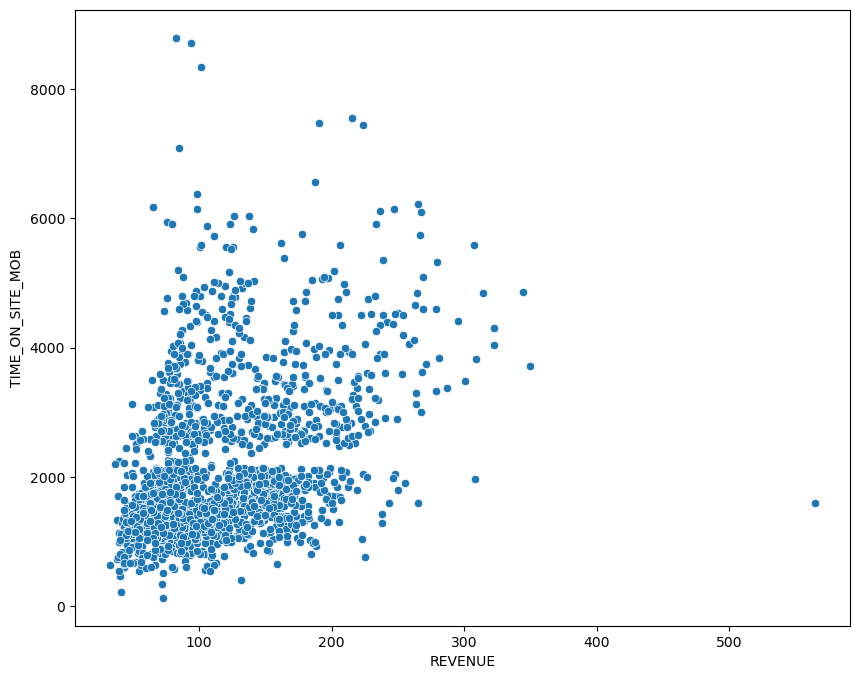

In [24]:
fig, ax = plt.subplots(figsize = (10, 8))

sns.scatterplot(x       = 'TIME_ON_SITE_MOB',
                y       = 'REVENUE',
                data    = classmeal)


# adding labels but not adding title
plt.xlabel(xlabel = 'REVENUE')
plt.ylabel(ylabel = 'TIME_ON_SITE_MOB')


In [25]:
############################################################################
#   CREATING OLS REGRESSIONS BASED ON CROSS_SELL_SUCCESS AND DUMMY VARIABLE
############################################################################

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """CROSS_SELL_SUCCESS ~ REVENUE   +
                                         TOTAL_MEALS_ORDERED + 
                                         UNIQUE_MEALS_PURCH +
                                         AVG_TIME_PER_SITE_VISIT +
                                         CANCELLATIONS_AFTER_NOON +
                                         MOBILE_LOGINS +
                                         WEEKLY_PLAN +
                                         LATE_DELIVERIES +
                                         AVG_PREP_VID_TIME +
                                         LARGEST_ORDER_SIZE +
                                         AVG_MEAN_RATING + 
                                         DOMAIN_GROUP_junk +
                                        
                                         TIME_ON_SITE_PC +
                                         NUM_MEALS_PER_PURCH    +
                                         REV_PER_UNIQUE_PURCH   +
                                         PRICE_PER_MEAL      
                                         """,
                  data = classmeal)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     CROSS_SELL_SUCCESS   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     15.75
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           1.68e-41
Time:                        19:59:18   Log-Likelihood:                -1159.7
No. Observations:                1946   AIC:                             2353.
Df Residuals:                    1929   BIC:                             2448.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

The next blocks of codes are an accumulation of value counts on the y-variable. This will make an estimate of assumptions that we can make in our further analysis. These assumptions might come in handy whilst developing new features or which features to put inside the models for optimal performance. 

The value counts will allow us to better understand the dataset and thus increase our domain knowledge. 

In [26]:
classmeal.groupby('CROSS_SELL_SUCCESS')['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 
                                        'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 
                                        'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 
                                        'MOBILE_LOGINS', 'WEEKLY_PLAN', 'LATE_DELIVERIES', 'AVG_PREP_VID_TIME', 
                                        'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 'TOTAL_PHOTOS_VIEWED', 
                                        'DOMAIN_GROUP_junk', 'DOMAIN_GROUP_personal', 'DOMAIN_GROUP_professional', 
                                        'NUM_MEALS_PER_PURCH', 'REV_PER_UNIQUE_PURCH', 'PRICE_PER_MEAL'].sum()


C:\Users\jaspe\AppData\Local\Temp\ipykernel_57844\3945996875.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  classmeal.groupby('CROSS_SELL_SUCCESS')['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',


,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,DOMAIN_GROUP_junk,DOMAIN_GROUP_personal,DOMAIN_GROUP_professional,NUM_MEALS_PER_PURCH,REV_PER_UNIQUE_PURCH,PRICE_PER_MEAL
CROSS_SELL_SUCCESS,,,,,,,,,,,,,,,,,,,,,
0,1312363.0,46321,4289,3066,3352,92655.3,773,3424,893,7147,1201,61623.34,2742,2241.315789,69103,227.0,259.0,139.0,7429.71,207805.99,23243.99
1,2788428.5,98917,9301,6479,7125,200327.8,2284,7310,1980,14901,2795,132207.31,5893,4676.315789,151090,162.0,602.0,557.0,15419.83,422801.40,47783.47


# Assumptions from value_counts

Where Cross Sell is a Success:                    Where cross sell is NOT a success:

2.7m revenue                                      vs 1.3m
99k meals ordered                                 vs 46k
9.3k unique meals                                 vs 4.2k
6.5k times customer service contact               vs 3k
7.1k cat viewed                                   vs 3.3k
200k time site visits                             vs 92k
2300 cancellations                                vs 800 
14900 weekly plans sold                           vs 7150 
2795 late deliveries                              vs 1201
132k prep vid time                                vs 61k
5900 largest orders                               vs 2750
151k photos viewed                                vs 69k
162 junk email domain                             vs 227
602 personal email domain                         vs 259
557 professional email domain                     vs 139


The odd ones out are cancellations and late deliveries. Why were there 3 times more cancellations in the 1 category?

And why were there double the amount of late deliveries in the 1 category? 

(possibly because more orders = more late deliveries and therefore also more cancellations)




Revenue, Total Meals Ordered, Unique Meals Purchased, Contacts with Customer Service, Product Categories Viewed, Avg Time Per Site Visit, Late Deliveries, Num Meals Per Purch, Revenue Per Unique Purch, and Price Per Meal all have higher values for customers who made a successful cross-sell purchase compared to those who did not.

The opposite is true for Cancellations After Noon, which has a higher value for customers who did not make a successful cross-sell purchase.

There is not a clear difference between the two groups in terms of PC Logins and Mobile Logins.

Domain Group (junk, personal, professional) appears to have a relationship with cross-sell success, with professional having the highest value for successful cross-sell purchases and junk having the lowest.


Below is an OLS regression with only significant p-value variables. F-statistic and R-squared seem to be low. I think it means there are other variables, or I am missing features, that explain the CROSS_SELL_SUCCESS. 

In [27]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """CROSS_SELL_SUCCESS ~ 
                                                REVENUE +
                                                TOTAL_MEALS_ORDERED + 
                                                AVG_TIME_PER_SITE_VISIT + 
                                                CANCELLATIONS_AFTER_NOON +
                                                MOBILE_LOGINS +
                                                DOMAIN_GROUP_personal +
                                                DOMAIN_GROUP_professional + 
                                                TIME_ON_SITE_PC + 
                                                NUM_MEALS_PER_PURCH +
                                                REV_PER_UNIQUE_PURCH
                                         """,
                  data = classmeal)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     CROSS_SELL_SUCCESS   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     26.69
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           4.11e-48
Time:                        19:59:18   Log-Likelihood:                -1153.5
No. Observations:                1946   AIC:                             2329.
Df Residuals:                    1935   BIC:                             2390.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Just as in the regression modelling, we're transforming all the variables which have a skewness higher than 1.0 into log variables. 

In [28]:
############################################################################
#             TRANSFORMING TO LOG VARIABLES HERE (everything above 1.0)
############################################################################

classmeal['log_REVENUE']                   = np.log(classmeal['REVENUE'] + 0.0001)
classmeal['log_TOTAL_MEALS_ORDERED']       = np.log(classmeal['TOTAL_MEALS_ORDERED']+ 0.0001)
classmeal['log_AVG_TIME_PER_SITE_VISIT']   = np.log(classmeal['AVG_TIME_PER_SITE_VISIT']+ 0.0001)
classmeal['log_CANCELLATIONS_AFTER_NOON']  = np.log(classmeal['CANCELLATIONS_AFTER_NOON']+ 0.0001)
classmeal['log_WEEKLY_PLAN']               = np.log(classmeal['WEEKLY_PLAN']+ 0.0001)
classmeal['log_LATE_DELIVERIES']           = np.log(classmeal['LATE_DELIVERIES']+ 0.0001)
classmeal['log_AVG_PREP_VID_TIME']         = np.log(classmeal['AVG_PREP_VID_TIME']+ 0.0001)
classmeal['log_TOTAL_PHOTOS_VIEWED']       = np.log(classmeal['TOTAL_PHOTOS_VIEWED']+ 0.0001)
classmeal['log_NUM_MEALS_PER_PURCH']       = np.log(classmeal['NUM_MEALS_PER_PURCH']+ 0.0001)
classmeal['log_PRICE_PER_MEAL']            = np.log(classmeal['PRICE_PER_MEAL']+ 0.0001)
classmeal['log_TIME_ON_SITE_PC']           = np.log(classmeal['TIME_ON_SITE_PC']+ 0.0001)



In the OLS regression below it shows that the coefficients from the features derived from REVENUE are cancelling each other out, so it would be a good idea to leave only 1 feature derived from REVENUE in the model as they are all trying to explain the same thing essentially. 

In [29]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """CROSS_SELL_SUCCESS ~ 
                                                     log_REVENUE +
                                                     log_TOTAL_MEALS_ORDERED + 
                                                     log_AVG_TIME_PER_SITE_VISIT +
                                                     log_CANCELLATIONS_AFTER_NOON +
                                                     log_WEEKLY_PLAN + 
                                                     log_LATE_DELIVERIES +
                                                     log_AVG_PREP_VID_TIME +
                                                     log_TOTAL_PHOTOS_VIEWED + 
                                                     log_NUM_MEALS_PER_PURCH + 
                                                     log_PRICE_PER_MEAL + 
                                                     log_TIME_ON_SITE_PC
                                         """,
                  data = classmeal)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     CROSS_SELL_SUCCESS   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.661
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           3.65e-05
Time:                        19:59:18   Log-Likelihood:                -1259.2
No. Observations:                1946   AIC:                             2542.
Df Residuals:                    1934   BIC:                             2609.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

Below I am testing out the logistic regression. The model seems to be fine, just the pseudo r-squared is very low, which aligns with the low correlations. 

In [30]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """CROSS_SELL_SUCCESS ~ CANCELLATIONS_AFTER_NOON""",
                           data    = classmeal)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.616790
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit              Pseudo R-squared: 0.017     
Dependent Variable:  CROSS_SELL_SUCCESS AIC:              2404.5484 
Date:                2023-02-19 19:59   BIC:              2415.6955 
No. Observations:    1946               Log-Likelihood:   -1200.3   
Df Model:            1                  LL-Null:          -1221.6   
Df Residuals:        1944               LLR p-value:      6.5383e-11
Converged:           1.0000             Scale:            1.0000    
No. Iterations:      5.0000                                         
--------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
--------------------------------------------------------------------
Intercept                0.4351   0.0678 6.4183 0.0000 0.3022 0.5679
CANCELLATIONS_AFTER_NOON 0.2140   0.0345 6.2041 0.0000 0.1464 0.2816
====================================================================

"""

After the small logistic regression, I am trying a bigger one, with all the variables that I already know have a significant p-value. There does not seem to change much in the output. Very low R-squared; meaning these variables do not explain the y-variable.

In [31]:
# instantiating a logistic regression model object
logistic_big = smf.logit(formula = """CROSS_SELL_SUCCESS ~ 
                                                TOTAL_MEALS_ORDERED + 
                                                AVG_TIME_PER_SITE_VISIT + 
                                                CANCELLATIONS_AFTER_NOON +
                                                MOBILE_LOGINS +
                                                DOMAIN_GROUP_personal +
                                                DOMAIN_GROUP_professional + 
                                                TIME_ON_SITE_PC 
                                                
                                                
                                                                """,
                           data    = classmeal)


# fitting the model object
results_logistic = logistic_big.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.569744
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                Logit                Pseudo R-squared:   0.092     
Dependent Variable:   CROSS_SELL_SUCCESS   AIC:                2233.4437 
Date:                 2023-02-19 19:59     BIC:                2278.0320 
No. Observations:     1946                 Log-Likelihood:     -1108.7   
Df Model:             7                    LL-Null:            -1221.6   
Df Residuals:         1938                 LLR p-value:        3.9541e-45
Converged:            1.0000               Scale:              1.0000    
No. Iterations:       6.0000                                             
-------------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
Intercept                 -1.2921   0.2398 -5.3885 0.0000 -1.7621 -0.8222
TOTAL_MEALS_ORDERED       -0.0011   0.0011 -0.9933 0.3206 -0.0032  0.0010
AVG_TIME_PER_SITE_VISIT    0.0084   0.0032  2.6053 0.0092  0.0021  0.0148
CANCELLATIONS_AFTER_NOON   0.2326   0.0362  6.4222 0.0000  0.1616  0.3036
MOBILE_LOGINS              0.2636   0.0990  2.6633 0.0077  0.0696  0.4576
DOMAIN_GROUP_personal      1.2180   0.1299  9.3736 0.0000  0.9633  1.4727
DOMAIN_GROUP_professional  1.7770   0.1429 12.4338 0.0000  1.4969  2.0572
TIME_ON_SITE_PC           -0.0360   0.0164 -2.1937 0.0283 -0.0682 -0.0038
=========================================================================

"""

In [32]:
classmeal.columns

Index(['CROSS_SELL_SUCCESS', 'EMAIL', 'REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'LATE_DELIVERIES', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 'TOTAL_PHOTOS_VIEWED', 'EMAIL_DOMAIN', 'DOMAIN_GROUP_junk', 'DOMAIN_GROUP_personal', 'DOMAIN_GROUP_professional', 'NUM_MEALS_PER_PURCH', 'REV_PER_UNIQUE_PURCH', 'PRICE_PER_MEAL', 'TIME_ON_SITE_MOB', 'TIME_ON_SITE_PC', 'CROSS_SELL_SUCCESS_0', 'CROSS_SELL_SUCCESS_1', 'log_REVENUE', 'log_TOTAL_MEALS_ORDERED', 'log_AVG_TIME_PER_SITE_VISIT', 'log_CANCELLATIONS_AFTER_NOON', 'log_WEEKLY_PLAN', 'log_LATE_DELIVERIES', 'log_AVG_PREP_VID_TIME', 'log_TOTAL_PHOTOS_VIEWED', 'log_NUM_MEALS_PER_PURCH', 'log_PRICE_PER_MEAL', 'log_TIME_ON_SITE_PC'], dtype='object')

Below I am making a dictionary of all the different variables that I will use in my analysis. 

In [33]:
candidate_dict = {
    
    #full model
    
    'full_x'     : ['TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 
                    'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 
                    'MOBILE_LOGINS', 'LATE_DELIVERIES', 'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 
                    'DOMAIN_GROUP_personal', 'DOMAIN_GROUP_professional', 
                    'NUM_MEALS_PER_PURCH','TIME_ON_SITE_PC'],
    
    'log_only'  : [ 'log_REVENUE', 'log_AVG_TIME_PER_SITE_VISIT', 'log_CANCELLATIONS_AFTER_NOON', 
                    'log_WEEKLY_PLAN', 'log_LATE_DELIVERIES', 'log_AVG_PREP_VID_TIME', 
                    'log_TOTAL_PHOTOS_VIEWED', 'log_NUM_MEALS_PER_PURCH','log_TIME_ON_SITE_PC'],
    
    'low_p'     : [ 'AVG_TIME_PER_SITE_VISIT','log_CANCELLATIONS_AFTER_NOON','MOBILE_LOGINS',
                    'DOMAIN_GROUP_personal','DOMAIN_GROUP_professional','TIME_ON_SITE_PC','NUM_MEALS_PER_PURCH'],
    
    'low_p_2'   : [ 'AVG_TIME_PER_SITE_VISIT','log_CANCELLATIONS_AFTER_NOON','MOBILE_LOGINS',
                    'DOMAIN_GROUP_junk','TIME_ON_SITE_PC','NUM_MEALS_PER_PURCH'],
    
    'test_1'    : [ 'DOMAIN_GROUP_junk','CONTACTS_W_CUSTOMER_SERVICE','log_CANCELLATIONS_AFTER_NOON',
                    'PRODUCT_CATEGORIES_VIEWED','AVG_MEAN_RATING'],
    
    'neg_coeff' : [],
    
    'pos_coeff' : []

}

In [34]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['full_x']}


Logarthmic var only:
--------------------------------
{candidate_dict['log_only']}


First Significant p-value Model:
---------------------------------
{candidate_dict['low_p']}

Second Significant p-value Model:
---------------------------------
{candidate_dict['low_p_2']}

Test Weird Variables:
---------------------------------
{candidate_dict['test_1']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS', 'LATE_DELIVERIES', 'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 'DOMAIN_GROUP_personal', 'DOMAIN_GROUP_professional', 'NUM_MEALS_PER_PURCH', 'TIME_ON_SITE_PC']


Logarthmic var only:
--------------------------------
['log_REVENUE', 'log_AVG_TIME_PER_SITE_VISIT', 'log_CANCELLATIONS_AFTER_NOON', 'log_WEEKLY_PLAN', 'log_LATE_DELIVERIES', 'log_AVG_PREP_VID_TIME', 'log_TOTAL_PHOTOS_VIEWED', 'log_NUM_MEALS_PER_PURCH', 'log_TIME_ON_SITE_PC']


First Significant p-value Model:
---------------------------------
['AVG_TIME_PER_SITE_VISIT', 'log_CANCELLATIONS_AFTER_NOON', 'MOBILE_LOGINS', 'DOMAIN_GROUP_personal', 'DOMAIN_GROUP_professional', 'TIME_ON_SITE_PC', 'NUM_MEALS_PER_PURCH']

Second Significant

In [35]:
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots

In [36]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

# MODELING STARTING HERE

In [37]:
# train/test split with the full model
classmeal_data   =  classmeal.loc[ : , candidate_dict['low_p']]
classmeal_target =  classmeal.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            classmeal_data,
            classmeal_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = classmeal_target)

The logistic regression model below is my final model, the outputs are given below. It is not my highest AUC score (which is from GBC .69), but this model also has the smallest gap between train and test scores (0.0005). 

In [38]:
############################################################################
#                  lOGISTIC REGRESSION MODEL HERE (THE FINAL MODEL)
############################################################################


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver       = 'lbfgs',
                            C            = 1,
                            max_iter     = 1000,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# area under the roc curve (auc)
print('LogReg AUC Score:        ', roc_auc_score(y_true  = y_test,
                                                 y_score = logreg_pred).round(decimals = 4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy

# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))

# saving gap for later
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7133
LogReg Testing  ACCURACY: 0.7128
LogReg AUC Score:         0.6095
LogReg Train-Test Gap   : 0.0005


In [39]:
df = pd.DataFrame(logreg.predict_proba(x_test))

df['predictions_at_61'] = 0

for index, column in df.iterrows():
        
    if df.iloc[index , 1] >= .61:
        df.loc[index, 'predictions_at_61'] = 1
        
threshold_auc = roc_auc_score(y_true  = y_test,
              y_score = df['predictions_at_61']).round(decimals = 4)

In [40]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 20
False Positives: 43
False Negatives: 13
True Positives : 119



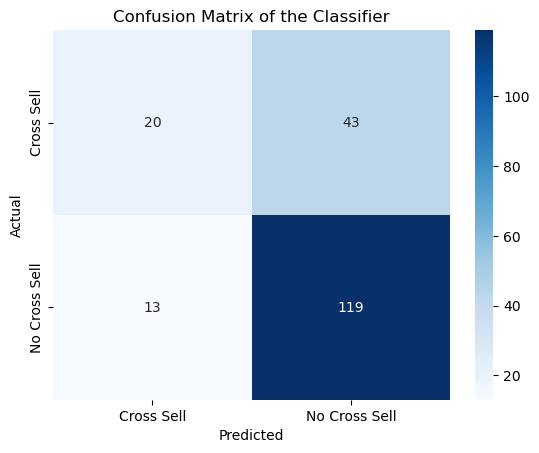

In [41]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Cross Sell', 'No Cross Sell'])

In [42]:
# zipping each feature name to its coefficient
logreg_model_values = zip(classmeal[candidate_dict['low_p']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -0.86)
('AVG_TIME_PER_SITE_VISIT', 0.01)
('log_CANCELLATIONS_AFTER_NOON', 0.05)
('MOBILE_LOGINS', 0.26)
('DOMAIN_GROUP_personal', 1.19)
('DOMAIN_GROUP_professional', 1.68)
('TIME_ON_SITE_PC', -0.03)
('NUM_MEALS_PER_PURCH', -0.01)


The hyper parameter tuner for the logistic regression model down below is being commented out for future reference, however, the results that came out were worse than the regular logistic regression. 

In [43]:
############################################################################
#               HYPERPARAMETER lOGISTIC REGRESSION MODEL HERE
############################################################################


# define AUC score as the scoring metric for tuning
#auc_scorer = make_scorer(roc_auc_score)

# define the parameter grid for the hyperparameters to be tuned
#param_grid = {
    
    
#    'C'                : [0.1, 1.0, 0.1],
#    'intercept_scaling': [1, 10, 1],
#    'solver'           : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    
#}

# create the GBC model
#log_tuned = LogisticRegression()

# perform the randomized search with cross-validation
#log_tuned_cv = RandomizedSearchCV(estimator           = log_tuned,
#                                  param_distributions = param_grid,
#                                  n_iter              = 100,
#                                  cv                  = 5,
#                                  random_state        = 219,
#                                  scoring             = auc_scorer)

# fit the model to the data
#log_tuned_cv.fit(x_train, y_train)

# print the best parameters and scores
#print("Best Parameters: ", log_tuned_cv.best_params_)
#print("Best AUC Score: ", log_tuned_cv.best_score_)
#print("Test AUC Score: ", roc_auc_score(y_true = y_test, y_score = log_tuned_cv.predict_proba(x_test)[:,1]))


#print('LogReg Training ACCURACY:', log_tuned_cv.score(x_train, y_train).round(4))
#print('LogReg Testing  ACCURACY:', log_tuned_cv.score(x_test, y_test).round(4))


In [44]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of

In [45]:
############################################################################
#                  KNN NEAREST NEIGHBORS MODEL HERE
############################################################################
knn = KNeighborsClassifier(n_neighbors = 5,
                           weights = 'uniform'
                          
                           # algorithm = 'auto',
                           # leaf_size = 30 
                           # keepdims = True
                          )



# FITTING the training data
knn_fit = knn.fit(x_train, y_train)


# PREDICTING on new data
knn_pred = knn_fit.predict(x_test)


# SCORING the model
print('knn Training ACCURACY:', knn_fit.score(x_train,
                                                     y_train).round(4))

print('knn Testing ACCURACY :', knn_fit.score(x_test,
                                                     y_test).round(4))

print('knn AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = knn_pred).round(4))


# saving scoring data for future use
knn_train_score = knn_fit.score(x_train, y_train).round(4) # accuracy
knn_test_score  = knn_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUCbench
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = knn_pred).round(4) # auc

knn Training ACCURACY: 0.7322
knn Testing ACCURACY : 0.641
knn AUC Score: 0.5357


C:\Users\jaspe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\jaspe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [46]:
############################################################################
#                  KNN CONFUSION MATRIX
############################################################################
knn_tn, \
knn_fp, \
knn_fn, \
knn_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tn}
False Positives: {knn_fp}
False Negatives: {knn_fn}
True Positives : {knn_tp}
""")


True Negatives : 15
False Positives: 48
False Negatives: 22
True Positives : 110



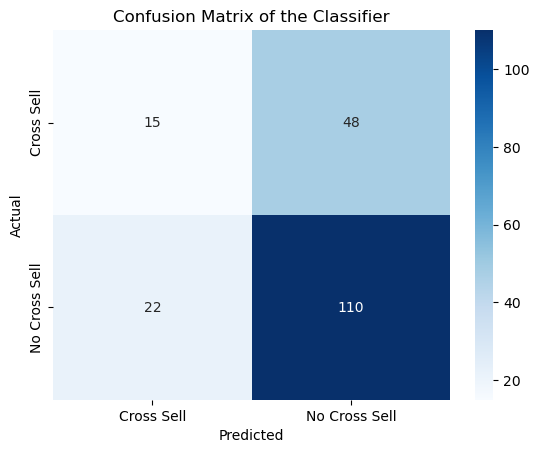

In [47]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Cross Sell', 'No Cross Sell'])

In [48]:
############################################################################
#                  DECISION TREE CLASSIFIER HERE
############################################################################
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 1.0
Full Tree Testing ACCURACY : 0.6
Full Tree AUC Score: 0.551


In [49]:
############################################################################
#                  DECISION TREE CONFUSION MATRIX
############################################################################
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 26
False Positives: 37
False Negatives: 41
True Positives : 91



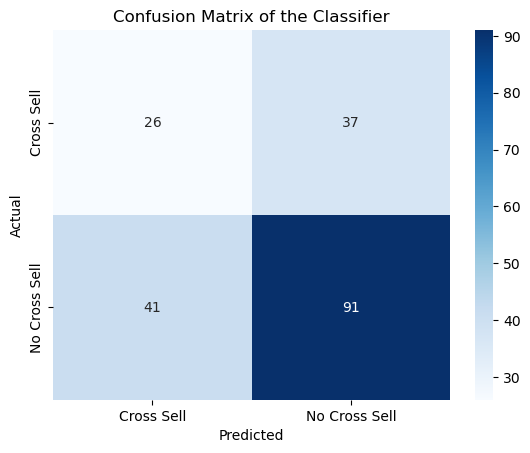

In [50]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = full_tree_pred,
          labels = ['Cross Sell', 'No Cross Sell'])

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [53]:
############################################################################
#                  RANDOM FOREST CLASSIFIER HERE
############################################################################

rfc = RandomForestClassifier(
    
                             #n_estimators = 100,
                             #criterion = 'gini',
                             #max_depth = 8,
                             #min_samples_split = 4,
                             #min_samples_leaf = 25,
                             #warm_start = False,
                             #random_state = 219

                             )

# FITTING the training data
rfc_fit = rfc.fit(x_train, y_train)


# PREDICTING on new data
rfc_pred = rfc_fit.predict(x_test)


# SCORING the model
print('rfc Training ACCURACY:', rfc_fit.score(x_train,
                                                     y_train).round(4))

print('rfc Testing ACCURACY :', rfc_fit.score(x_test,
                                                     y_test).round(4))

print('rfc AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = rfc_pred).round(4))


# saving scoring data for future use
rfc_train_score = rfc_fit.score(x_train, y_train).round(4) # accuracy
rfc_test_score  = rfc_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
rfc_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = rfc_pred).round(4) # auc

rfc Training ACCURACY: 1.0
rfc Testing ACCURACY : 0.7179
rfc AUC Score: 0.6299


In [54]:
############################################################################
#                  RANDOM FOREST CONFUSION MATRIX
############################################################################
rfc_tn, \
rfc_fp, \
rfc_fn, \
rfc_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rfc_tn}
False Positives: {rfc_fp}
False Negatives: {rfc_fn}
True Positives : {rfc_tp}
""")


True Negatives : 26
False Positives: 37
False Negatives: 41
True Positives : 91



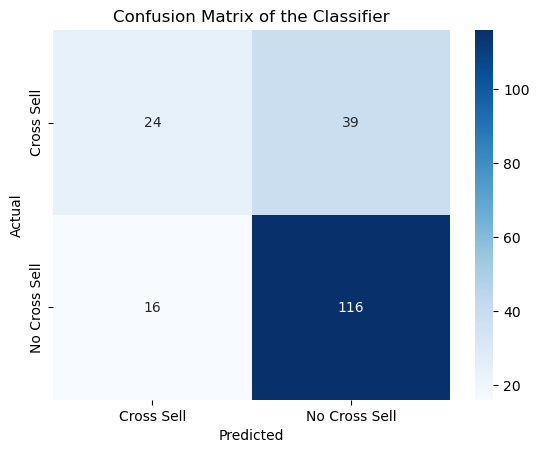

In [55]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = rfc_pred,
          labels = ['Cross Sell', 'No Cross Sell'])

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special case where only a single regression tree is in

In [58]:
from sklearn.model_selection import RandomizedSearchCV


In [59]:
help(RandomizedSearchCV)

Help on class RandomizedSearchCV in module sklearn.model_selection._search:

class RandomizedSearchCV(BaseSearchCV)
 |  RandomizedSearchCV(estimator, param_distributions, *, n_iter=10, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score=nan, return_train_score=False)
 |  
 |  Randomized search on hyper parameters.
 |  
 |  RandomizedSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated search over parameter settings.
 |  
 |  In contrast to GridSearchCV, not all parameter values are tried out, but
 |  rather a fixed number of parameter settings is sampled from the specified
 |  distributions. The number of parameter settings that are tried is
 |  

In [60]:
from sklearn.metrics import make_scorer, roc_auc_score

In [61]:
2*10*10*4*4*3

9600

In [62]:
############################################################################
#              HYPERPARAMETER TUNING GRADIENT BOOSTING CLASSIFIER
############################################################################

# define AUC score as the scoring metric for tuning
#auc_scorer = make_scorer(roc_auc_score)

# define the parameter grid for the hyperparameters to be tuned
#param_grid = {
#    'loss' : ['deviance', 'exponential'],
#    'learning_rate': [0.1, 1.0, 0.1],
#    'n_estimators': [100, 1001, 100],
#    'criterion' : ['friedman_mse', 'squared_error', 'mse', 'absolute_error'],
#    'max_depth': [1, 5, 1],
#    'min_samples_leaf' : [10,25,5]
    
#}

# create the GBC model
#GBC_model = GradientBoostingClassifier(random_state=219)

# perform the randomized search with cross-validation
#GBC_cv = RandomizedSearchCV(estimator           = GBC_model,
#                            param_distributions = param_grid,
#                            n_iter              = 100,
#                            cv                  = 5,
#                            random_state        = 219,
#                            scoring             = auc_scorer)
#
# fit the model to the data
#GBC_cv.fit(x_train, y_train)

# print the best parameters and scores
#print("Best Parameters: ", GBC_cv.best_params_)
#print("Best AUC Score: ", GBC_cv.best_score_)
#print("Test AUC Score: ", roc_auc_score(y_true = y_test, y_score = GBC_cv.predict_proba(x_test)[:,1]))


In [63]:
############################################################################
#                HYPER PARAMETER GRADIENT BOOSTING CLASSIFIER
############################################################################
# INSTANTIATING the model object without hyperparameters
#model = GradientBoostingClassifier()

#loss_range             = ['squared_error', 'absolute_error', 'huber', 'quantile']
#learning_rate_range    = range (1, 4, 1)
#n_estimators_range     = range (100,1000,500)
#criterion_range        = ['friedman_mse', 'squared_error', 'mse', 'mae']
#min_samples_leaf_range = range (1,5,1)
#max_depth              = (1,5,1)
#max_features_range     = ["auto", "sqrt", "log2"]

#param_grid = {"loss"                   : loss_range,          
#              "learning_rate"          : learning_rate_range,
#              "n_estimators"            : n_estimators_range}


# RandomizedSearchCV object
#model_cv = RandomizedSearchCV(estimator           = model,
#                              param_distributions = param_grid,
#                              n_iter              = 24,
#                              cv                  = 3,
#                              random_state        = 219)



# FITTING to the FULL DATASET (due to cross-validation)
#model_cv.fit(x_train, y_train)



# printing the optimal parameters and best score
#print(f"Tuned Parameters: {model_cv.best_params_}")
#print(f"Tuned R-Square:   {model_cv.best_score_}")

# printing the optimal parameters and best score for AUC
#print(f"Tuned Parameters (AUC): {model_cv.best_params_}")
#print(f"Tuned AUC:   {auc_scorer(model_cv.best_estimator_, x_data, y_data)}")



In [64]:
############################################################################
#                  GRADIENT BOOSTING CLASSIFIER HERE 
############################################################################

# naming the model
GBC = GradientBoostingClassifier()


# fitting the model
GBC_fit = GBC.fit(x_train, y_train)

# predicing the model
GBC_pred = GBC_fit.predict(x_test)

#scoring the model

print('GBC test ACCURACY', GBC_fit.score(x_train, y_train).round(decimals = 4))

print('GBC train ACCURACY', GBC_fit.score(x_test, y_test).round(decimals = 4))

print("GBC AUC Score: ", roc_auc_score(y_true  = y_test, 
                                    y_score = GBC_pred).round(decimals=4))

# saving the scores for future use
GBC_train_score = GBC_fit.score(x_train, y_train).round(decimals=4)
GBC_test_score  = GBC_fit.score(x_test, y_test).round(decimals=4)

# saving auc score
GBC_auc_score   = roc_auc_score(y_true  = y_test, 
                                y_score = GBC_pred).round(decimals=4)

GBC test ACCURACY 0.771
GBC train ACCURACY 0.6974
GBC AUC Score:  0.5815


In [65]:
############################################################################
#                 GBC REGULAR CONFUSION MATRIX 
############################################################################
GBC_tn, \
GBC_fp, \
GBC_fn, \
GBC_tp = confusion_matrix(y_true = y_test, y_pred = GBC_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {GBC_tn}
False Positives: {GBC_fp}
False Negatives: {GBC_fn}
True Positives : {GBC_tp}
""")


True Negatives : 16
False Positives: 47
False Negatives: 12
True Positives : 120



# Confusion matrix explanation

In the confusion matrix below, it can be seen that in the top left corner there were 16 users where the model predicted that they would cross sell and that they actually successful in cross selling.

In the top right corner, there are 47 users where the model predicted that would not cross sell, but they actually did cross sell. 

In the bottom left corner, there are 12 users where the model predicts that it would cross sell, but they actually did not cross sell.

In the bottom right corner, there are 120 users where the model predict that they would not cross and they also did not succesfully cross sell. 

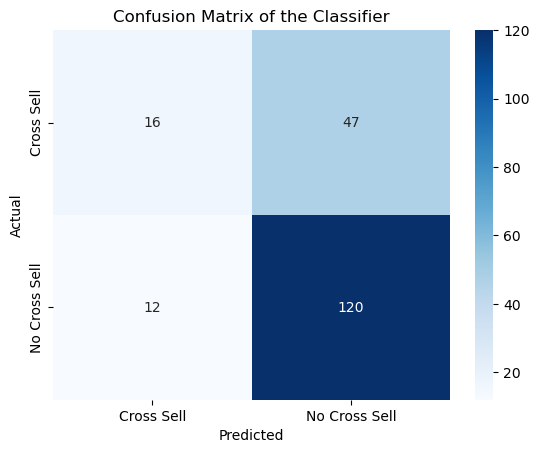

In [66]:
############################################################################
#                 GBC REGULAR CONFUSION MATRIX 
############################################################################

# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = GBC_pred,
          labels = ['Cross Sell', 'No Cross Sell'])

As we unfold the classification model it is important to understand its implications. 

The drawback of wrongfully predicting whether a customer purchases more meals, beverages or other things, is potentially a larger mistake than wrongfully predicting a customer who will cross sell and then it does not cross sell. 

This is because the business might potentially spend money on marketing, promotions, production, personnel (extra deliveries), supply, inventory (food goes bad after a while), because the model predicted that a certain amount of customers would buy more. This will hurt the company's profit almost twice as hard because 1) it expected the revenue according to the model which it will not receive and 2) all the extra investments that have been made to satisfy the demand of the customers go bad and are a waste of money which cannot be retrieved. 

However, in this model, only 12 users were wrongfully predicted; so one might argue that the mistake is of minimal effect. 

In [67]:
############################################################################
#                  GRADIENT BOOSTING CLASSIFIER HERE
############################################################################

# naming the model
GBC = GradientBoostingClassifier(loss              = 'deviance',
                                 learning_rate     = 0.5,
                                 n_estimators      = 100,
                                 criterion         = 'friedman_mse',
                                 # min_samples_split = 2,
                                 min_samples_leaf  = 5,
                                 max_depth         = 5,
                                 random_state      = 219)
                                 # warm_start        = False)


# fitting the model
GBC_fit = GBC.fit(x_train, y_train)

# predicing the model
GBC_tuned_pred = GBC_fit.predict(x_test)

#scoring the model

print('GBC test ACCURACY', GBC_fit.score(x_train, y_train).round(decimals = 4))

print('GBC train ACCURACY', GBC_fit.score(x_test, y_test).round(decimals = 4))

print("GBC AUC Score: ", roc_auc_score(y_true  = y_test, 
                                y_score = GBC_pred).round(decimals=4))

# saving the scores for future use
GBC_train_score = GBC_fit.score(x_train, y_train).round(decimals=4)
GBC_test_score  = GBC_fit.score(x_test, y_test).round(decimals=4)

# saving auc test score
GBC_auc_test_score = roc_auc_score(y_true  = y_test, 
                                y_score = GBC_pred).round(decimals=4)

GBC test ACCURACY 0.9977
GBC train ACCURACY 0.6667
GBC AUC Score:  0.5815


In [68]:
############################################################################
#                 GBC TUNED CONFUSION MATRIX
############################################################################
GBC_tuned_tn, \
GBC_tuned_fp, \
GBC_tuned_fn, \
GBC_tuned_tp = confusion_matrix(y_true = y_test, y_pred = GBC_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {GBC_tuned_tn}
False Positives: {GBC_tuned_fp}
False Negatives: {GBC_tuned_fn}
True Positives : {GBC_tuned_tp}
""")


True Negatives : 16
False Positives: 47
False Negatives: 12
True Positives : 120



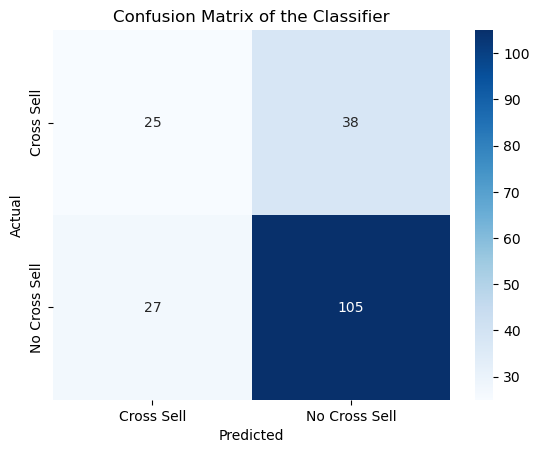

In [69]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = GBC_tuned_pred,
          labels = ['Cross Sell', 'No Cross Sell'])

In [70]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth        = 4,
                                     min_samples_leaf = 25,
                                     random_state     = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pruned_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pruned_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pruned_pred).round(4) # auc

Training ACCURACY: 0.7276
Testing  ACCURACY: 0.6974
AUC Score        : 0.5691


In [71]:
############################################################################
#                 DECISION TREE TUNED CONFUSION MATRIX
############################################################################

pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pruned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 13
False Positives: 50
False Negatives: 9
True Positives : 123



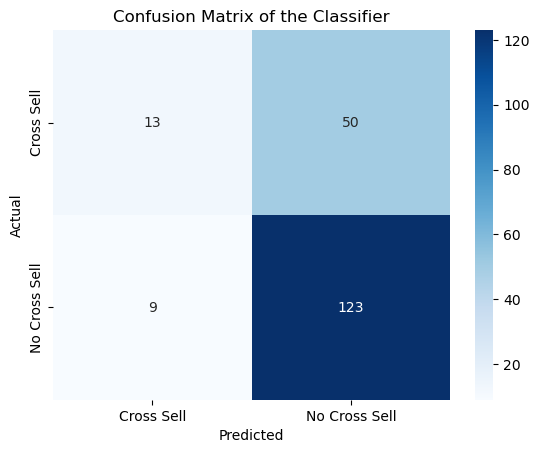

In [72]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = tree_pruned_pred,
          labels = ['Cross Sell', 'No Cross Sell'])

In [73]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
KNN           {knn_auc_score}         {knn_tn, knn_fp, knn_fn, knn_tp}
Random Forest {rfc_auc_score}         {rfc_tn, rfc_fp, rfc_fn, rfc_tp}
GBC           {GBC_auc_score}         {GBC_tn, GBC_fp, GBC_fn, GBC_tp}
GBC Tuned     {GBC_auc_test_score}         {GBC_tuned_tn, GBC_tuned_fp, GBC_tuned_fn, GBC_tuned_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./__results/classification_model_performance.xlsx',
                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6095         (20, 43, 13, 119)
Full Tree     0.551         (26, 37, 41, 91)
Pruned Tree   0.5691         (13, 50, 9, 123)
KNN           0.5357         (15, 48, 22, 110)
Random Forest 0.6299         (26, 37, 41, 91)
GBC           0.5815         (16, 47, 12, 120)
GBC Tuned     0.5815         (16, 47, 12, 120)



# Final model (dynamic string)

In [74]:
print(f"""

Model                                   =   Logistic Regression
Train Score                             =   {logreg_train_score}
Test Score                              =   {logreg_test_score}
Train Test Gap                          =   {logreg_test_gap}
Original AUC score                      =   {logreg_auc_score}
'Changing the Prediction Threshold AUC' =   {threshold_auc}
Confusion Matrix                        =   {logreg_tn, logreg_fp, logreg_fn, logreg_tp}

""")






Model                                   =   Logistic Regression
Train Score                             =   0.7133
Test Score                              =   0.7128
Train Test Gap                          =   0.0005
Original AUC score                      =   0.6095
'Changing the Prediction Threshold AUC' =   0.6192
Confusion Matrix                        =   (20, 43, 13, 119)




# Conclusion & reflection

This project in order to increase the AUC has been another challenging assignment; and one that has not really paid off. I have tried many different models, many of its parameters are not in this script as either the gap was too big, or the test score was overfitting, or simply the AUC was too low. 

It was difficult to find the sweet spot between which features to engineer, what information the model required and how to proceed. A few times I went all the way back and started from scratch thinking about which features, or the value_counts, or trying to understand if the data types were wrong. 

In the end, the AUC has only increased untill .6192, which is not where it is supposed to be. However, it's been a meaningful project in terms of getting a better understanding of various data visualizations, such as the confusion matrices, as well as understanding better how different models work. 